# **`Task 2- Explore Supervised Machine Learning`**

## **Table of Contents**
**1.** [Problem Statement.](#prbstmt) <br>
**2.** [Data Exploration.](#datexp) <br> 
**3.** [Preparing Data For Training & Testing the Model.](#pdftt) <br>
**4.** [Training The Model.](#ttm) <br>
**5.** [Making Prediction.](#makepred) <br>
**6.** [Model Evaluation.](#evalmodel)<br>

<a id='prbstmt'></a>
## 1. Problem Statement
We have given a data set of student which contains 2 columns: 
- **1-> Hours -** number of hours they studied
- **2-> Scores -** score of students. <br/>
So we have to predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

<a id='datexp'></a>
## 2. Data Exploration
This **[data set](http://bit.ly/w-data)** contains 2 columns as described above **Hours** & **Scores**

In [1]:
# Importing necessary libraries 
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
# Reading data
df = pd.read_csv("student_scores.csv")
print("Data imported successfully")

df.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


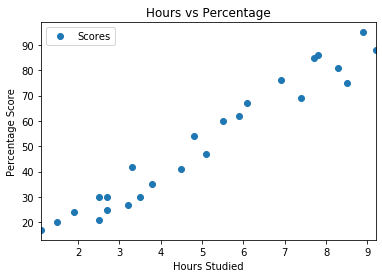

In [3]:
## Now we ploting the data set to visualize some relationship in the data set.
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the above visualization, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score. <br>
So we can use Linear Regression Model here.**

<a id='pdftt'></a>
## 3. Preparing Data for Training & Testing the model.

In [4]:
# Taking "attributes" inputs & "lables" outputs.
x = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [5]:
# Spliting the data into train & test sets.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 

<a id='ttm'></a>
## 4. Training the Model
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [6]:
# Import the Linear Regression Model & train it.
from sklearn.linear_model import LinearRegression  

LR = LinearRegression()  # Classifier object.  
LR.fit(x_train, y_train) # Train the model.

print("Training of model is completed.")

Training of model is completed.


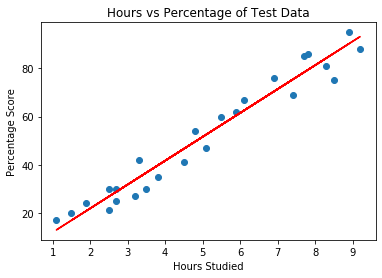

In [7]:
# Plotting the regression line
line = LR.coef_*x + LR.intercept_  # Similar to Y = M*X + C

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line, color= 'red');
plt.title('Hours vs Percentage of Test Data')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.show()

<a id='makepred'></a>
## 5. Making Predictions
Now that we have trained our model, it's time to make some predictions from it.

In [8]:
print(x_test) # Testing data - In Hours
y_pred = LR.predict(x_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [9]:
# Comparing Actual vs Predicted values.
df_comp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df_comp 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [10]:
# We test with our own data values.
hours = 9.25
own_pred = LR.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


<a id='evalmodel'></a>
## 6. Model Evaluation

Now we evaluate the performance of model to see how well this model perform on a particular dataset. For simplicity here, we have chosen the mean square error.

In [11]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


In [12]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9454906892105356

As r2 score is near about 1 so it's a good model for now.